In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df_train = pd.read_pickle('training_set_VU_DM.pkl')
df_test = pd.read_pickle('test_set_VU_DM.pkl')

In [65]:
df_train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [66]:
len(df_train)

4958347

In [67]:
print(len(df_test))
df_test.head()

4959183


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# which columns contain NaN values
df_train.columns[df_train.isna().any()].tolist()

['visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_review_score',
 'prop_location_score2',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'comp1_rate',
 'comp1_inv',
 'comp1_rate_percent_diff',
 'comp2_rate',
 'comp2_inv',
 'comp2_rate_percent_diff',
 'comp3_rate',
 'comp3_inv',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp5_rate',
 'comp5_inv',
 'comp5_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'comp8_rate',
 'comp8_inv',
 'comp8_rate_percent_diff',
 'gross_bookings_usd']

In [69]:
len(df_train[df_train.isnull().sum(axis=1) > 25]) / len(df_train)

0.42308273301566024

In [70]:
len(df_train[df_train['visitor_location_country_id'] == df_train['prop_country_id']]) / len(df_train)

0.638119518460487

date
2012-12-24    10738
2013-06-26    29551
Name: srch_id, dtype: int64


<AxesSubplot:title={'center':'Data entries per date'}, xlabel='Date', ylabel='Data Entries'>

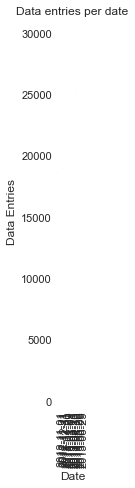

In [71]:
# Range of dates
df_train['date_time'] = pd.to_datetime(df_train['date_time'])
df_train['date'] = df_train['date_time'].dt.date
print(df_train.groupby('date')['srch_id'].count().sort_values()[[0,-1]])
ax = df_train.groupby('date')['srch_id'].count().plot(kind='bar', ylabel='Data Entries', xlabel='Date', title='Data entries per date')
ax.set_xticklabels([t if not i%20 else "" for i,t in enumerate(ax.get_xticklabels())])
ax

In [72]:
df_train['season'] = (df_train['date_time'].dt.month%12 + 3)//3
# df_train['season'] = df_train['date_time'].dt.quarter
display(df_train['date_time'].dt.quarter.unique())
nums = [1, 2, 3, 4]
seasons = ['winter', 'spring', 'summer', 'fall']
df_train['season'] = df_train['season'].replace(nums, seasons)
display(df_train[df_train['season'] == 'summer'].sort_values('date'))
df_train.head()

array([2, 4, 1], dtype=int64)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,date,season
3344268,224583,2013-06-01 08:48:31,5,219,NaN,NaN,219,123280,0,4.5,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013-06-01,summer
4177478,280267,2013-06-01 10:56:12,5,219,NaN,NaN,219,105551,3,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013-06-01,summer
4177479,280267,2013-06-01 10:56:12,5,219,NaN,NaN,219,121810,3,4.5,...,NaN,NaN,-1.0,0.0,8.0,0,NaN,0,2013-06-01,summer
4177480,280267,2013-06-01 10:56:12,5,219,NaN,NaN,219,124694,3,4.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013-06-01,summer
4177481,280267,2013-06-01 10:56:12,5,219,NaN,NaN,219,131317,3,5.0,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013-06-01,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993275,267986,2013-06-30 05:55:00,5,15,4.3,268.25,99,102274,3,4.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013-06-30,summer
3993276,267986,2013-06-30 05:55:00,5,15,4.3,268.25,99,109243,3,4.5,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013-06-30,summer
3993277,267986,2013-06-30 05:55:00,5,15,4.3,268.25,99,116209,3,0.0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013-06-30,summer
3995649,268153,2013-06-30 07:02:56,5,219,NaN,NaN,219,53547,3,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013-06-30,summer


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,date,season
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013-04-04,spring
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013-04-04,spring
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013-04-04,spring
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,2013-04-04,spring
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013-04-04,spring


<AxesSubplot:xlabel='Season', ylabel='Frequency'>

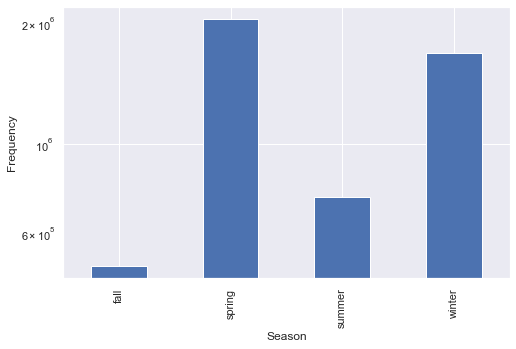

In [73]:
sns.set(rc={'figure.figsize':(8, 5)})
df_train.groupby('season')['srch_id'].count().plot(kind='bar', logy=True, ylabel='Frequency', xlabel='Season')

<AxesSubplot:xlabel='Length of Stay (days)', ylabel='Frequency'>

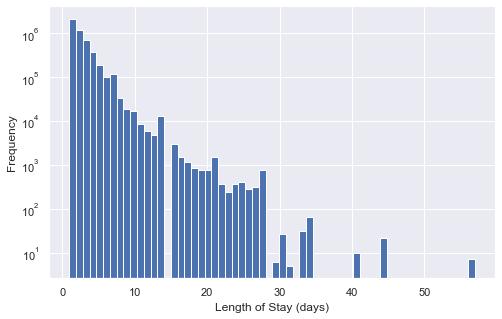

In [12]:
plt.xlabel('Length of Stay (days)')
df_train['srch_length_of_stay'].plot(kind='hist', logy=True, xlabel='Length of Stay (days)', bins=60)

<AxesSubplot:xlabel='Difference', ylabel='Frequency'>

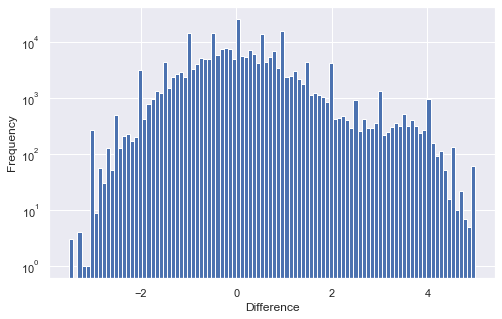

In [29]:
df_sub = df_train[['visitor_hist_starrating', 'prop_starrating']]
df_sub = df_sub[df_sub.isnull().sum(axis=1) == 0]
diff_rating = df_sub['visitor_hist_starrating'] - df_sub['prop_starrating']
plt.xlabel('Difference')
diff_rating.plot(kind='hist', bins=100, logy=True)

<AxesSubplot:xlabel='Difference', ylabel='Frequency'>

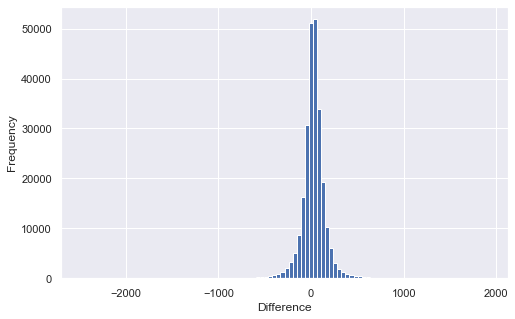

In [30]:
df_sub = df_train[['visitor_hist_adr_usd', 'price_usd']]
df_sub = df_sub[df_sub.isnull().sum(axis=1) == 0]
diff_rating = df_sub['visitor_hist_adr_usd'] - df_sub['price_usd']
diff_rating = diff_rating[diff_rating.abs() < 2500]
plt.xlabel('Difference')
diff_rating.plot(kind='hist', logy=False, bins=100)

<AxesSubplot:xlabel='Booking Probability', ylabel='Frequency'>

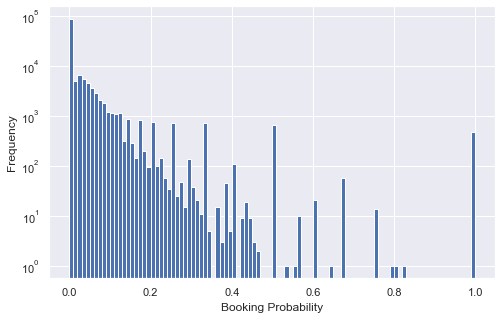

In [76]:
book_prob = (df_train.groupby('prop_id')['booking_bool'].sum() / df_train.groupby('prop_id')['booking_bool'].count()).round(decimals=2)
plt.xlabel('Booking Probability')
book_prob.plot(kind='hist', bins=100, logy=True)

<AxesSubplot:xlabel='Click Probability', ylabel='Frequency'>

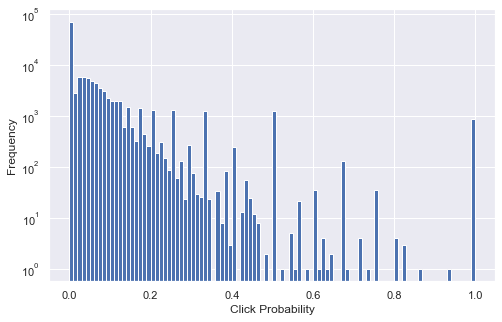

In [77]:
click_prob = (df_train.groupby('prop_id')['click_bool'].sum() / df_train.groupby('prop_id')['click_bool'].count()).round(decimals=2)
plt.xlabel('Click Probability')
click_prob.plot(kind='hist', bins=100, logy=True)

C:\Users\julia\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:515: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(self.ylim)


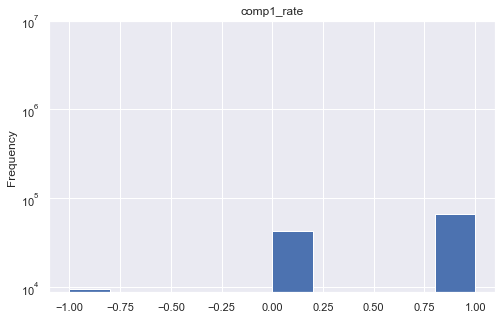

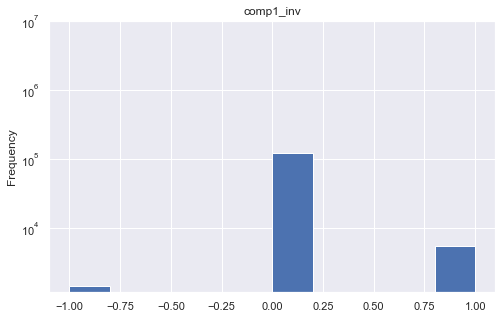

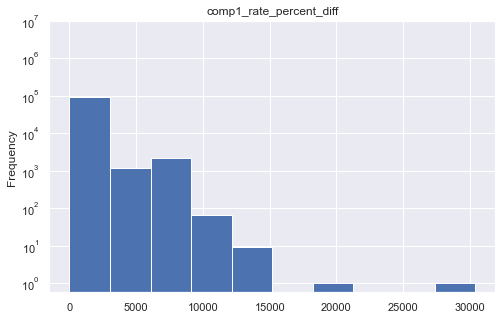

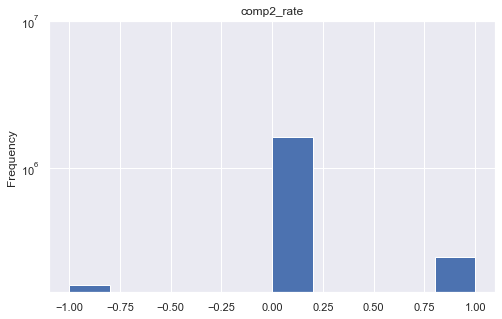

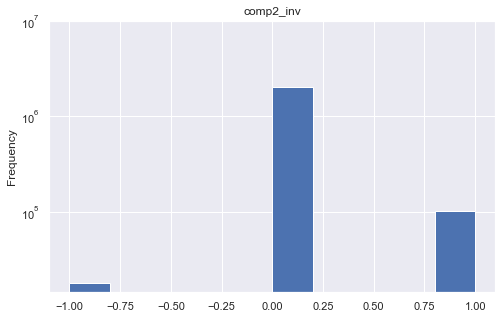

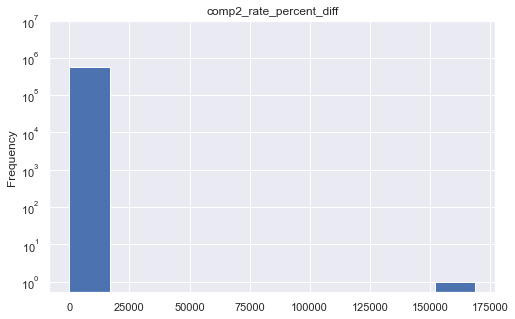

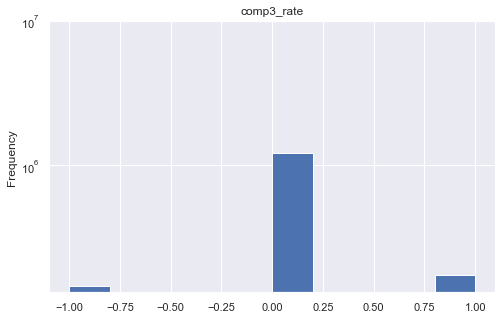

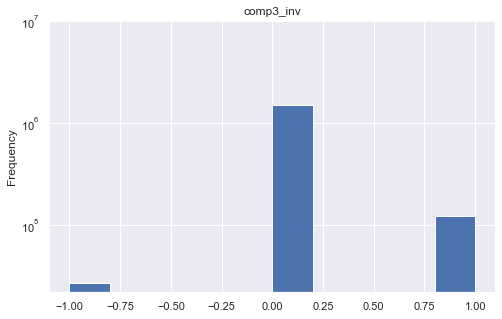

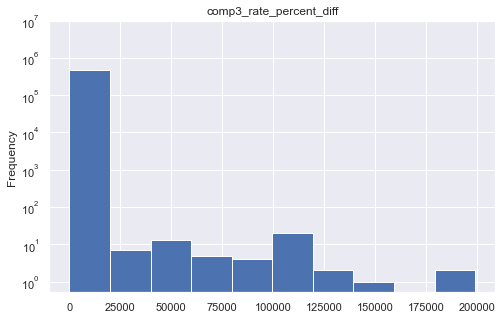

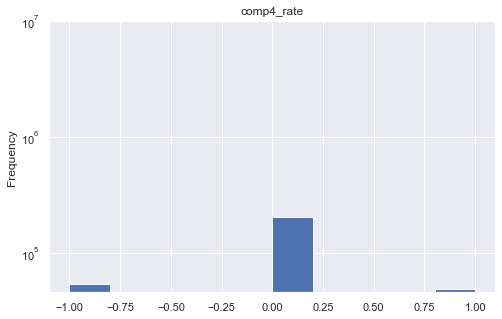

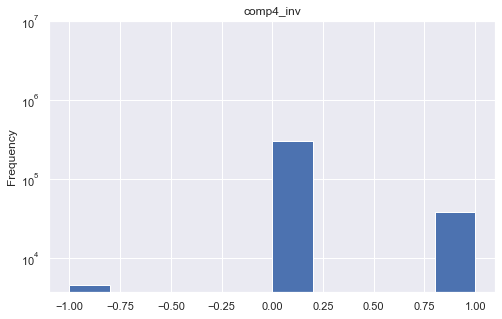

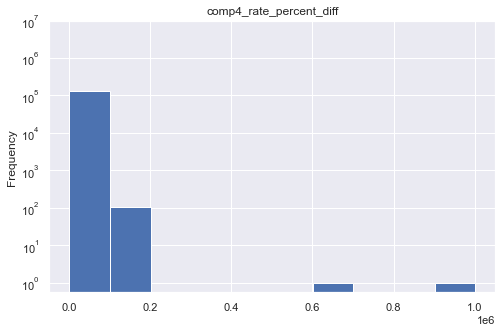

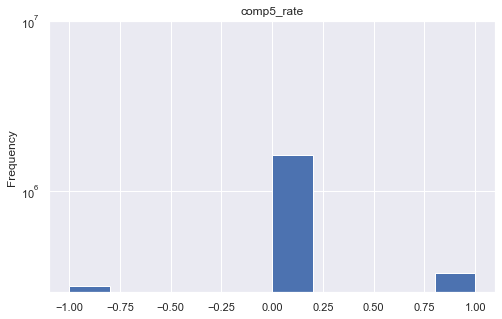

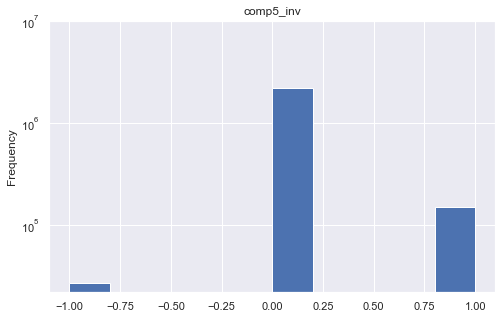

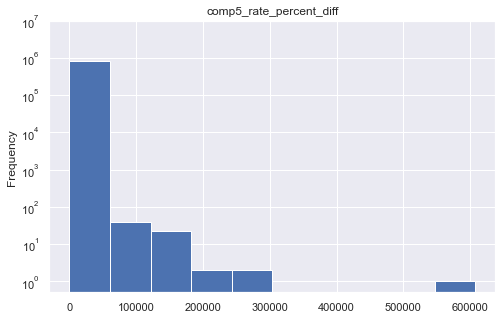

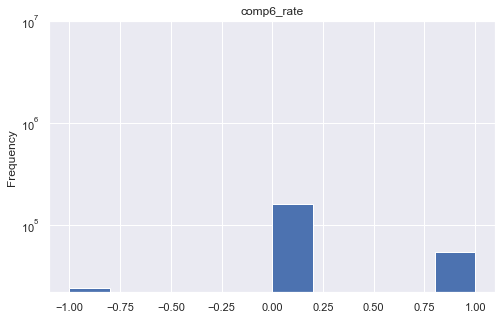

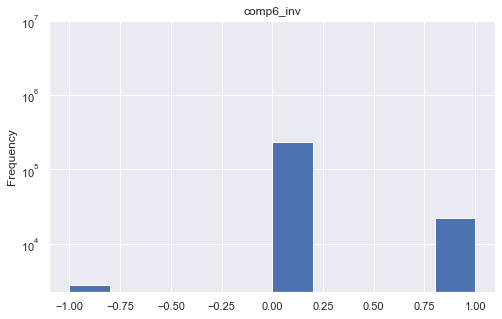

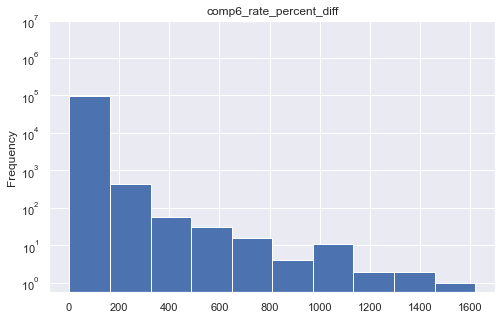

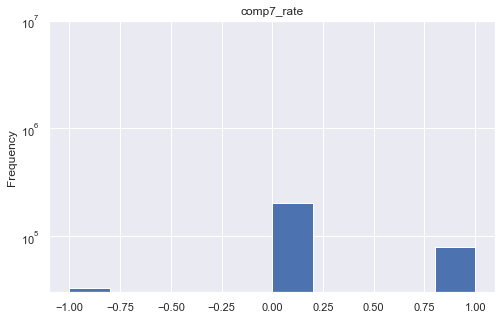

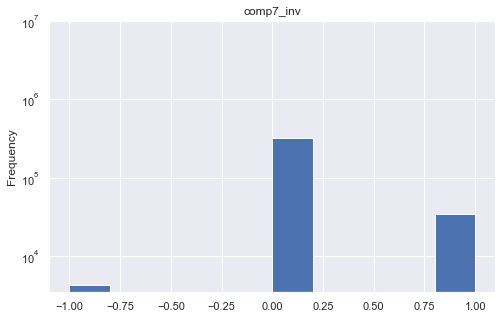

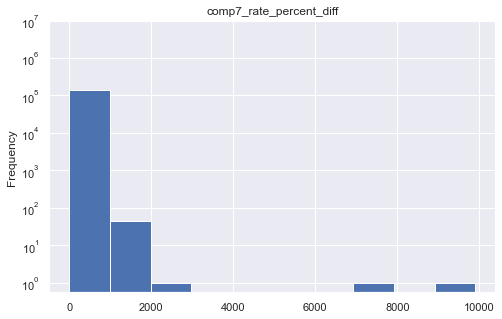

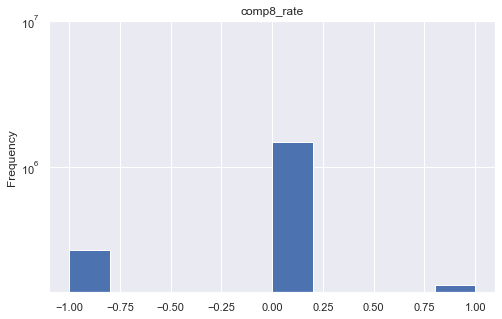

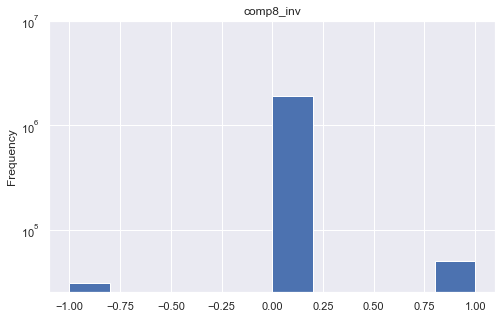

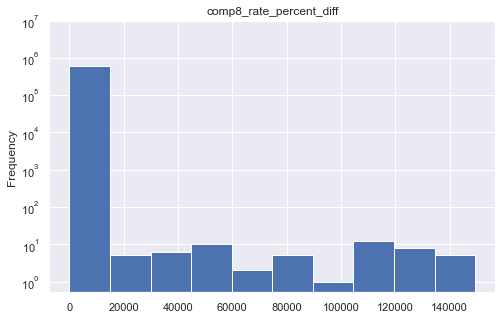

In [17]:
# look into competitors columns
df_comp = df_train[[col for col in df_train.columns if 'comp' in col]]
for col in df_comp:
    df_comp[col].plot(kind='hist', logy=True, ylim=(0, 10**7), title=col)
    plt.show()
    
# df_comp2 = df_train[[col for col in df_train.columns if 'comp' in col and 'inv' in col]]


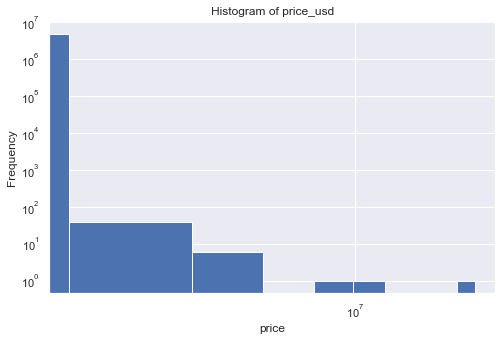

In [18]:
# explore price_usd
plt.xlabel('price')
df_train['price_usd'].plot(kind='hist', logx=True, logy=True, title='Histogram of price_usd')
plt.show()

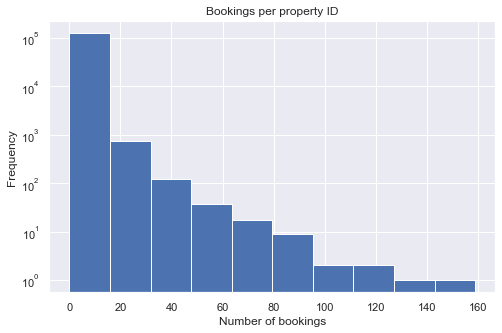

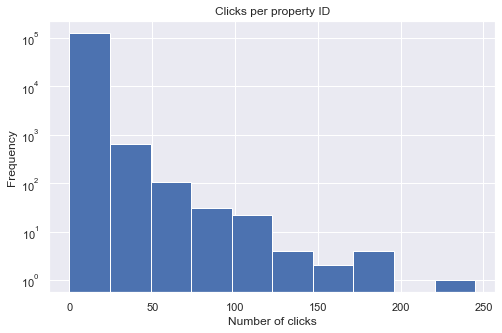

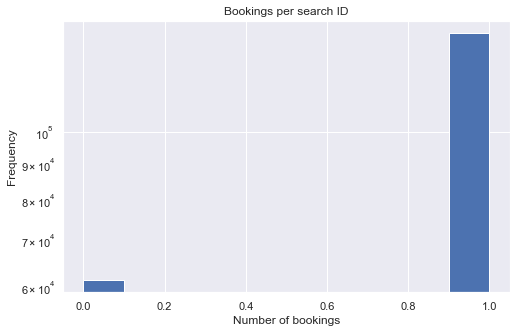

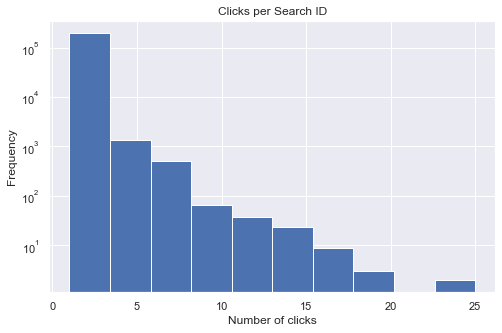

Number of properties with different amount of booking_bool than click_bool:  37712
Number of searches with different amount of booking_bool than click_bool:  69916
Number of rows where booking_bool is 1 and click_bool is 0:  0
Number of rows where booking_bool is 0 and click_bool is 1:  83489


In [19]:
# explore booking_bool & click_bool
plt.xlabel('Number of bookings')
df_train.groupby('prop_id')['booking_bool'].sum().plot(kind='hist', logy=True, title='Bookings per property ID')
plt.show()
plt.xlabel('Number of clicks')
df_train.groupby('prop_id')['click_bool'].sum().plot(kind='hist', logy=True, title='Clicks per property ID')
plt.show()
plt.xlabel('Number of bookings')
df_train.groupby('srch_id')['booking_bool'].sum().plot(kind='hist', logy=True, title='Bookings per search ID')
plt.show()
plt.xlabel('Number of clicks')
df_train.groupby('srch_id')['click_bool'].sum().plot(kind='hist', logy=True, title='Clicks per Search ID')
plt.show()
check = df_train.groupby('prop_id')['booking_bool'].sum() == df_train.groupby('prop_id')['click_bool'].sum()
print('Number of properties with different amount of booking_bool than click_bool: ', len(check[check == False])) # elke property wordt precies even vaak geboekt als dat er op geklikt wordt
check2 = df_train.groupby('srch_id')['booking_bool'].sum() == df_train.groupby('srch_id')['click_bool'].sum()
print('Number of searches with different amount of booking_bool than click_bool: ', len(check2[check2 == False]))
print('Number of rows where booking_bool is 1 and click_bool is 0: ', len(df_train[df_train['booking_bool'] > df_train['click_bool']])) # er kan niet geboekt worden als er niet geklikt is
print('Number of rows where booking_bool is 0 and click_bool is 1: ', len(df_train[df_train['click_bool'] > df_train['booking_bool']]))

Number of unique search ids: 199795, total number of entries: 4958347.


<AxesSubplot:title={'center':'Number of entries per Search ID'}, xlabel='number of entries', ylabel='Frequency'>

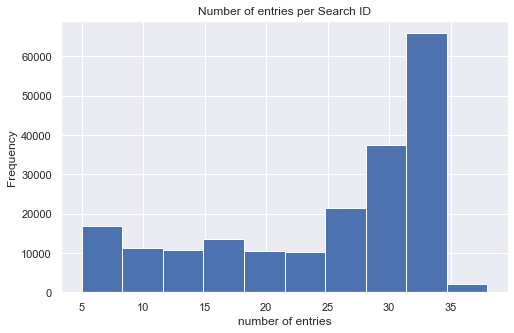

In [20]:
# srch id multiple times
print(f'Number of unique search ids: {len(df_train["srch_id"].unique())}, total number of entries: {len(df_train)}.')
plt.xlabel('number of entries')
df_train.groupby('srch_id')['date_time'].count().plot(kind='hist', title='Number of entries per Search ID')
# search id does not appear to be the id of a search, but more probably the id of a user.

<AxesSubplot:title={'center':'Number of entries per day'}, xlabel='number of entries', ylabel='Frequency'>

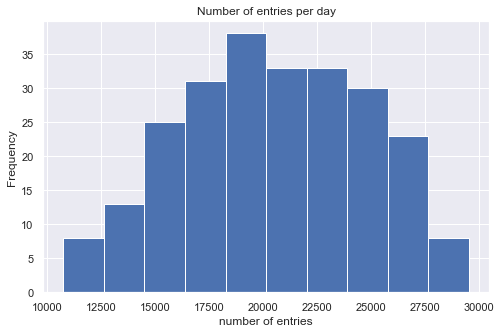

In [21]:
# searches per day
plt.xlabel('number of entries')
df_train.groupby('date')['srch_id'].count().plot(kind='hist', title='Number of entries per day')

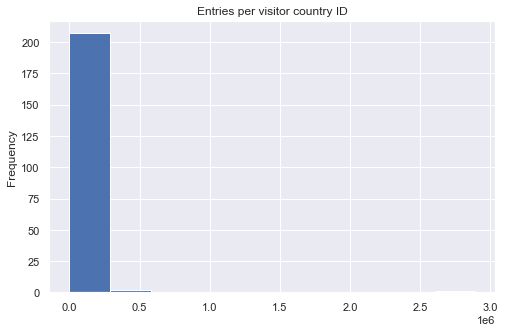

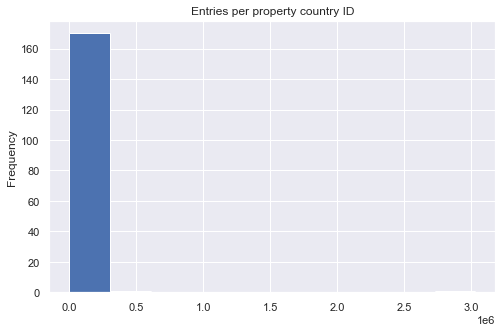

In [22]:
# searches per country id
df_train.groupby('visitor_location_country_id')['srch_id'].count().plot(kind='hist', title='Entries per visitor country ID')
plt.show()
df_train.groupby('prop_country_id')['srch_id'].count().plot(kind='hist', title='Entries per property country ID')
plt.show()

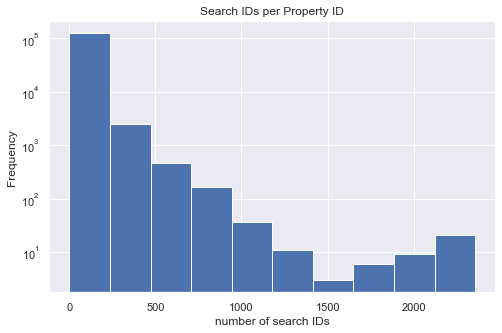

In [23]:
# searches per property id
plt.xlabel('number of search IDs')
df_train.groupby('prop_id')['srch_id'].count().plot(kind='hist', logy=True, title='Search IDs per Property ID')
plt.show()

In [57]:
# correlation matrix
df_corr = df_train.copy()
df_corr['target'] = (df_corr['booking_bool']*5) + df_corr['click_bool']
# display(df_corr)
df_corr = df_corr[['srch_room_count',
                'srch_length_of_stay',
                'prop_brand_bool',
                'srch_adults_count',
                'srch_children_count',
                'srch_query_affinity_score',
                'visitor_hist_starrating',
                'srch_booking_window',
                'orig_destination_distance',
                'promotion_flag',
                'visitor_hist_adr_usd',
                'random_bool',
                'prop_review_score',
                'prop_starrating',
                'prop_log_historical_price',
                'prop_location_score1',
                'prop_location_score2',
                'price_usd',
                'comp8_rate_percent_diff',
                'target']]
cor = df_corr.corr()
cor

,srch_room_count,srch_length_of_stay,prop_brand_bool,srch_adults_count,srch_children_count,srch_query_affinity_score,visitor_hist_starrating,srch_booking_window,orig_destination_distance,promotion_flag,visitor_hist_adr_usd,random_bool,prop_review_score,prop_starrating,prop_log_historical_price,prop_location_score1,prop_location_score2,price_usd,comp8_rate_percent_diff,target
srch_room_count,1.000000,0.002111,0.021232,0.471428,0.135387,-0.014296,0.023669,0.039504,0.020720,0.011597,0.015631,-0.003915,0.015614,0.037151,0.000780,0.022457,-0.015752,-0.000703,0.001390,0.008052
srch_length_of_stay,0.002111,1.000000,-0.107402,0.011260,0.038336,0.028553,0.077293,0.262616,0.227805,0.115967,0.085236,0.176213,-0.021135,0.091217,0.033426,0.117521,0.016817,0.001565,0.002845,-0.019680
prop_brand_bool,0.021232,-0.107402,1.000000,0.006918,0.036102,-0.034613,-0.183249,-0.097656,-0.205972,-0.118841,-0.057195,-0.048390,0.203949,0.021329,0.001311,-0.184617,-0.085203,-0.000993,-0.001317,0.008460
srch_adults_count,0.471428,0.011260,0.006918,1.000000,0.096640,-0.005124,-0.011558,0.110007,-0.020818,0.017321,0.039195,0.050721,0.019175,0.006948,-0.010369,0.019014,0.002969,0.001955,-0.002645,-0.003494
srch_children_count,0.135387,0.038336,0.036102,0.096640,1.000000,-0.033269,0.036969,0.052099,-0.034837,-0.004519,0.064613,0.015594,0.014948,-0.031148,-0.048204,-0.020746,-0.054009,0.002528,-0.002616,0.004459
srch_query_affinity_score,-0.014296,0.028553,-0.034613,-0.005124,-0.033269,1.000000,0.159158,0.023336,-0.048158,0.038488,0.097640,0.136231,0.035633,0.041781,0.025336,0.054217,0.075046,0.012607,0.007710,0.029070
visitor_hist_starrating,0.023669,0.077293,-0.183249,-0.011558,0.036969,0.159158,1.000000,0.092211,0.273962,0.083416,0.498618,0.015375,-0.000815,0.295903,0.060343,0.250895,0.054019,0.174804,0.004346,-0.001234
srch_booking_window,0.039504,0.262616,-0.097656,0.110007,0.052099,0.023336,0.092211,1.000000,0.321485,0.027074,0.111427,0.148153,0.005258,0.074016,0.079877,0.119707,0.040222,0.001517,-0.005095,-0.015873
orig_destination_distance,0.020720,0.227805,-0.205972,-0.020818,-0.034837,-0.048158,0.273962,0.321485,1.000000,0.088541,0.159176,0.024706,-0.050853,0.182595,0.049227,0.217603,0.052531,0.007830,0.002150,-0.002585
promotion_flag,0.011597,0.115967,-0.118841,0.017321,-0.004519,0.038488,0.083416,0.027074,0.088541,1.000000,0.045911,-0.022626,0.057970,0.173732,0.039050,0.180326,0.045440,0.001217,-0.003232,0.038078


<AxesSubplot:>

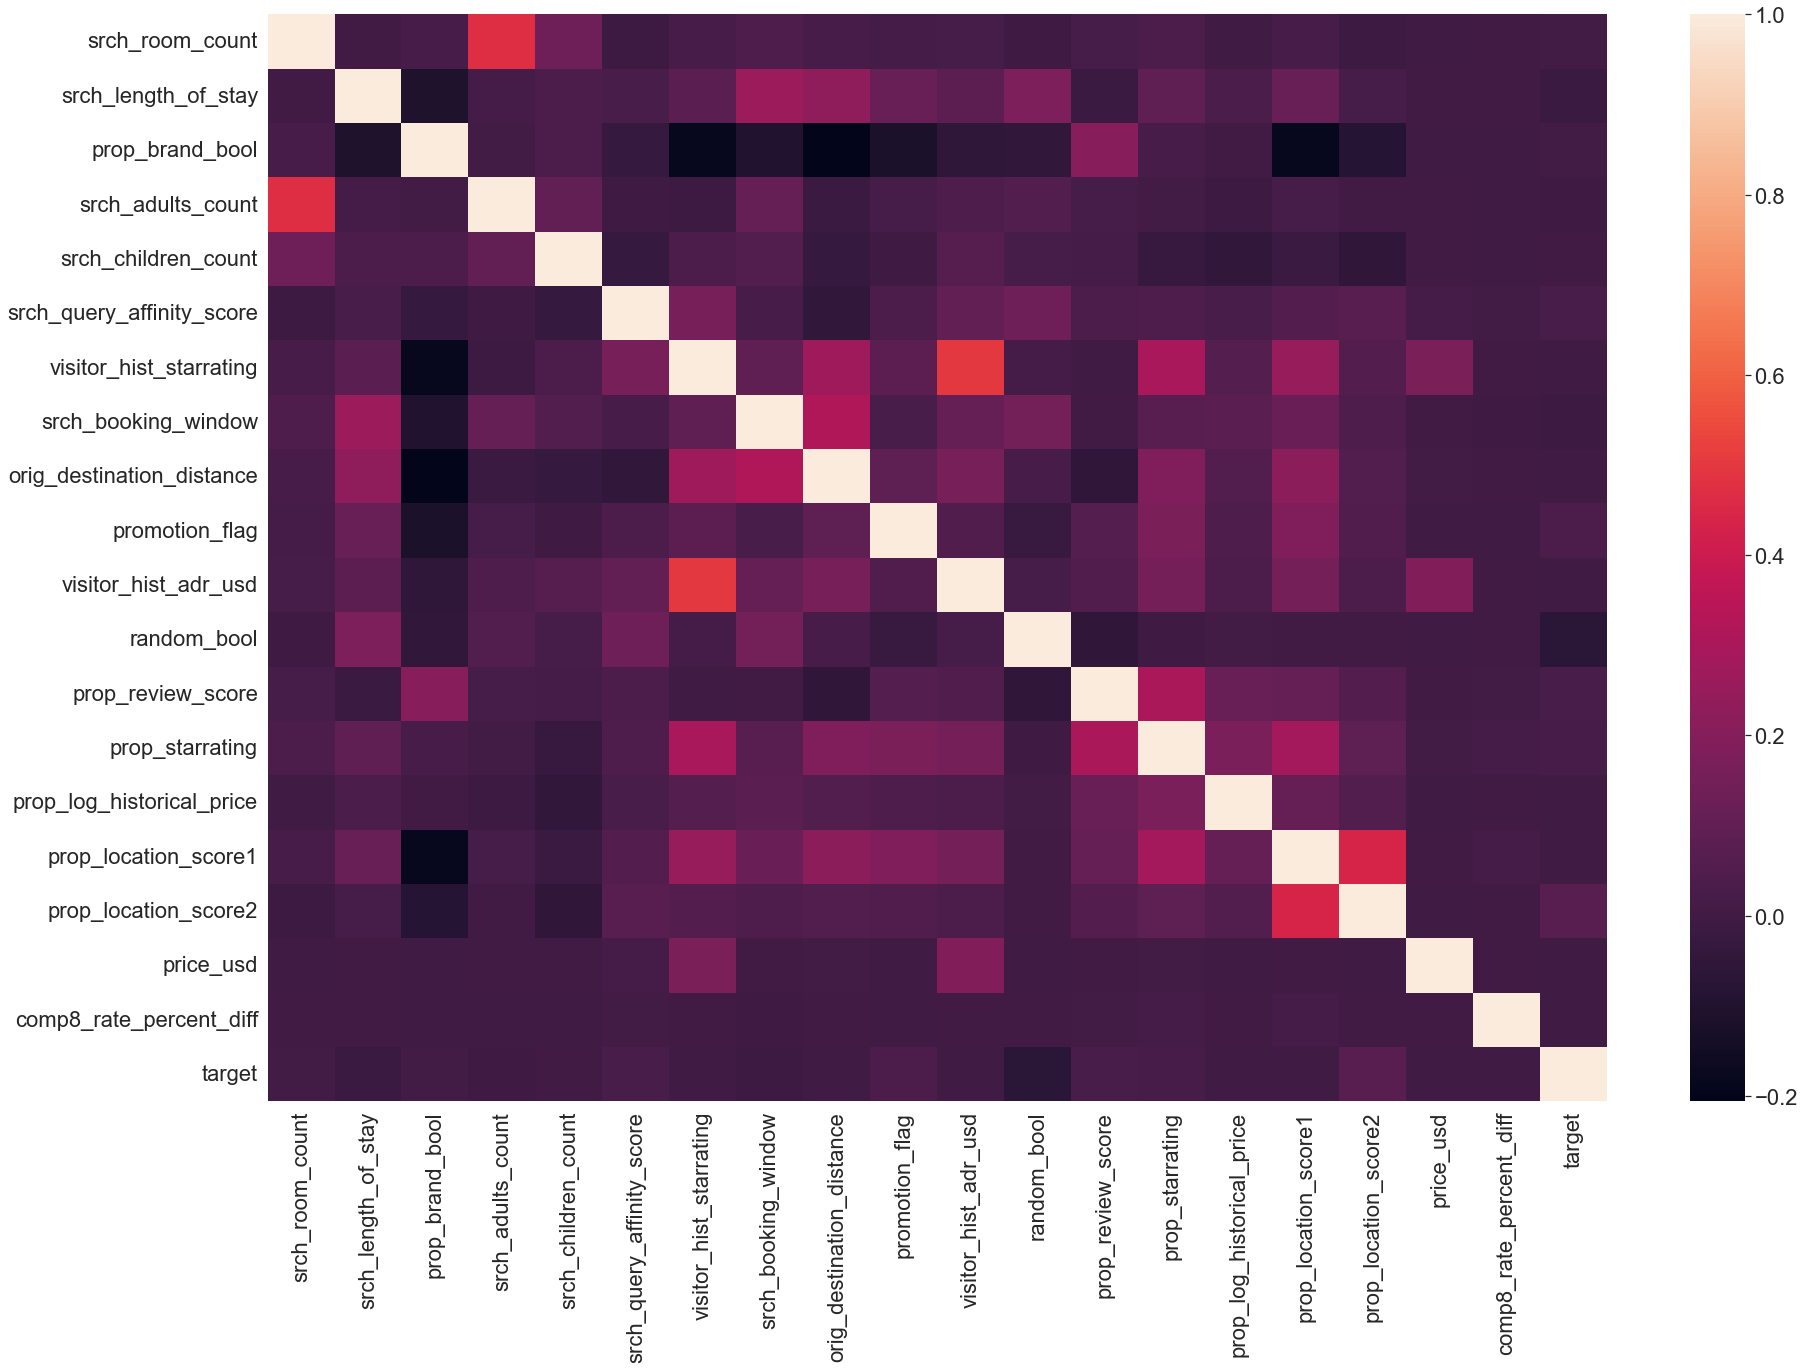

In [58]:
# heatmap of correlation matrix
sns.set(rc={'figure.figsize':(30, 20)})
sns.set(font_scale=2)
sns.heatmap(cor)

<AxesSubplot:>

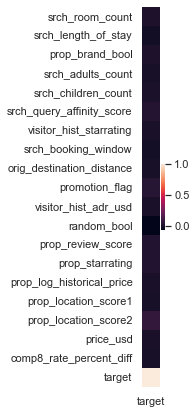

In [62]:
# heatmap of correlation between all features and booking_bool
sns.set(rc={'figure.figsize':(0.4, 7)})
# sns.set(font_scale=1)
sns.heatmap(cor[['target']])